<a href="https://colab.research.google.com/github/roymuli/Africa-GDP-Population-Analysis/blob/main/Albanus_Muli_Project_BANK_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Introduction**

## a. Libraries

In [1]:
# import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

## b. Read file

In [2]:
file_path ='/content/bank_transactions.csv' # use pandas to read csv file

In [3]:
df = pd.read_csv(file_path)

In [4]:
# overview of dataset
df.head(4)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,"17,819.05",2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,"2,270.69",2/8/16,141858,"27,999.00"
2,T3,C4417068,26/11/96,F,MUMBAI,"17,874.44",2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,"866,503.21",2/8/16,142714,"2,060.00"


In [5]:
df.tail(3)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,"221,757.06",18/9/16,183313,770.00
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,"10,117.87",18/9/16,184706,"1,000.00"
1048566,T1048567,C8337524,5/3/84,M,PUNE,"75,734.42",18/9/16,181222,"1,166.00"


From the dataset overview above;
- The first transaction is T1 and the last transaction is T408797
- the last transaction is null


## c. Eyeballing

In [6]:
# rows and columns
row, columns = df.shape
Rows = df.shape[0]
Columns = df.shape[1]
print(f'Rows: {Rows}\nColumns: {Columns}')

Rows: 1048567
Columns: 9


In [7]:
#see the columns
df.columns.to_list()

['TransactionID',
 'CustomerID',
 'CustomerDOB',
 'CustGender',
 'CustLocation',
 'CustAccountBalance',
 'TransactionDate',
 'TransactionTime',
 'TransactionAmount (INR)']

- TransactionID is a unique transaction identifier
- CustomerID is a unique customers for they associate transactions with specic individuals
- CustomerDOB helps in calculating customer age for dempgraphic analysis & segmentation
- CustLocation gives geographical location of customers
- CustAccountBalance for financial analysis and spending habits
- TransactionDate identifies trends over time
- TransactionTime for time series analysis
TransactionAount (INR) transaction amount im Indian Rupees

In [8]:
df['CustomerID'].isna().sum()

0

# **2. Data cleaning and preprocessing**

In [9]:
# show datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


- Transaction date need to be changed to datetime object


In [10]:
# Datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

df['TransactionTime']  =  df['TransactionTime'].astype('float')



In [11]:
#confirm dtypes again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1048567 non-null  object        
 1   CustomerID               1048567 non-null  object        
 2   CustomerDOB              1045170 non-null  datetime64[ns]
 3   CustGender               1047467 non-null  object        
 4   CustLocation             1048416 non-null  object        
 5   CustAccountBalance       1046198 non-null  float64       
 6   TransactionDate          1048567 non-null  datetime64[ns]
 7   TransactionTime          1048567 non-null  float64       
 8   TransactionAmount (INR)  1048567 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(4)
memory usage: 72.0+ MB


In [12]:
df.head(3)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,"17,819.05",2016-02-08,"143,207.00",25.00
1,T2,C2142763,2057-04-04,M,JHAJJAR,"2,270.69",2016-02-08,"141,858.00","27,999.00"
2,T3,C4417068,1996-11-26,F,MUMBAI,"17,874.44",2016-02-08,"142,712.00",459.00


In [13]:
# check missing values
df.isna().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,3397
CustGender,1100
CustLocation,151
CustAccountBalance,2369
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


We have missing values in

                          - Customer gender
                          - customer location
                          - Customer account balance
                          - Customer date of birth
For customer date of birth, we can create new column of customer age, and replace the missing values with mean

Again, with no names in the dataset, when have nothing we can use to help fill the missing customer gender, so is location
We can also use the mean of account balances to fill the misssing values

In [14]:
# handle missing values
# 1. Customer date of birth

max_date = df['TransactionDate'].max().year # get the maximum transaction date
min_date = df['CustomerDOB'].min().year
df['Age'] = max_date - df['CustomerDOB'].dt.year
print(max_date, min_date)

2016 1800


From the overview above, it seems age needs to be treated for;

- we have negative ages
- we have very small minimum age

<Axes: >

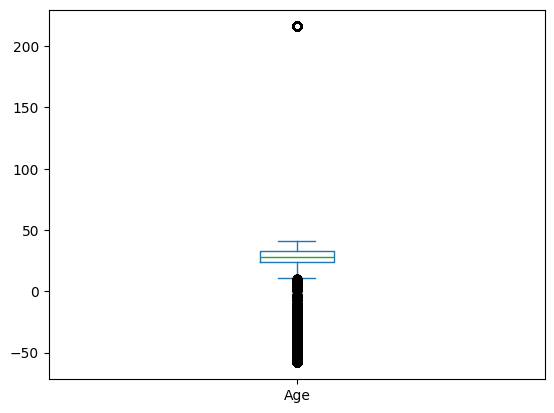

In [15]:
df['Age'].plot(kind = 'box')

The box plot above shows that we have outliers for attribute age

In [16]:
df.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,"17,819.05",2016-02-08,"143,207.00",25.00,22.00
1,T2,C2142763,2057-04-04,M,JHAJJAR,"2,270.69",2016-02-08,"141,858.00","27,999.00",-41.00
2,T3,C4417068,1996-11-26,F,MUMBAI,"17,874.44",2016-02-08,"142,712.00",459.00,20.00
3,T4,C5342380,2073-09-14,F,MUMBAI,"866,503.21",2016-02-08,"142,714.00","2,060.00",-57.00
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,"6,714.43",2016-02-08,"181,156.00","1,762.50",28.00
5,T6,C1536588,2072-08-10,F,ITANAGAR,"53,609.20",2016-02-08,"173,940.00",676.00,-56.00
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,"173,806.00",566.00,24.00
7,T8,C1220223,1982-01-27,M,MUMBAI,"95,075.54",2016-02-08,"170,537.00",148.00,34.00
8,T9,C8536061,1988-04-19,F,GURGAON,"14,906.96",2016-02-08,"192,825.00",833.00,28.00
9,T10,C6638934,1984-06-22,M,MUMBAI,"4,279.22",2016-02-08,"192,446.00",289.11,32.00


In [17]:
# handle age
df[df['Age'] <0][:10]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
1,T2,C2142763,2057-04-04,M,JHAJJAR,"2,270.69",2016-02-08,"141,858.00","27,999.00",-41.00
3,T4,C5342380,2073-09-14,F,MUMBAI,"866,503.21",2016-02-08,"142,714.00","2,060.00",-57.00
5,T6,C1536588,2072-08-10,F,ITANAGAR,"53,609.20",2016-02-08,"173,940.00",676.00,-56.00
15,T16,C8334633,2068-10-07,F,NEW DELHI,"1,283.12",2016-01-08,"125,725.00",250.00,-52.00
30,T31,C7648712,2067-01-21,F,NEW DELHI,"298,461.05",2016-03-08,"160,642.00",500.00,-51.00
51,T52,C6637047,2066-07-25,M,PUNE,"9,956.49",2016-05-08,"133,141.00",145.00,-50.00
79,T80,C6612422,2067-05-25,M,DELHI,"257,966.29",2016-01-08,"204,252.00",195.64,-51.00
80,T81,C8342660,2067-04-05,M,DUBAI,"6,190.71",2016-01-08,"210,610.00",878.00,-51.00
87,T88,C7918237,2074-03-09,M,JAMMU,"23,302.14",2016-06-08,"122,039.00","2,200.00",-58.00
93,T94,C5232732,2072-04-28,M,NEW DELHI,"7,330.62",2016-06-08,"170,022.00","2,813.62",-56.00


In [18]:
#add = lambda x,y: x+y
#print(add(4,5))

In [19]:
replac = lambda x: x.replace(year=x.year-100) if x.year > max_date else x
df['CustomerDOB'] = df['CustomerDOB'].apply(replac)

In [20]:
df.head(3)


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,"17,819.05",2016-02-08,"143,207.00",25.00,22.00
1,T2,C2142763,1957-04-04,M,JHAJJAR,"2,270.69",2016-02-08,"141,858.00","27,999.00",-41.00
2,T3,C4417068,1996-11-26,F,MUMBAI,"17,874.44",2016-02-08,"142,712.00",459.00,20.00


In [21]:
df['Age'] = max_date - df['CustomerDOB'].dt.year

In [22]:
df.head(2)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,"17,819.05",2016-02-08,"143,207.00",25.00,22.00
1,T2,C2142763,1957-04-04,M,JHAJJAR,"2,270.69",2016-02-08,"141,858.00","27,999.00",59.00


<Axes: >

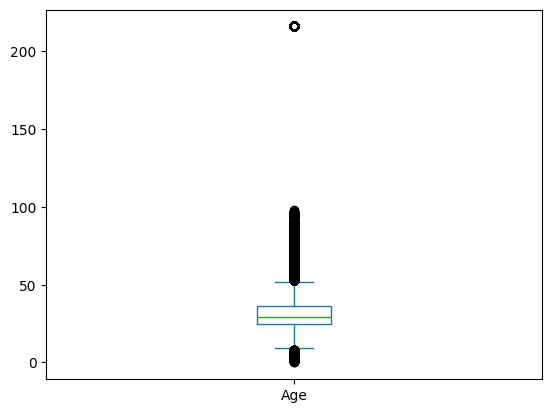

In [23]:
df['Age'].plot(kind='box')

In [24]:
df.select_dtypes(include=['float64', 'int64']).columns

Index(['CustAccountBalance', 'TransactionTime', 'TransactionAmount (INR)',
       'Age'],
      dtype='object')

It appears that we have outliers, we first treat them so that we can handle missing values, for instance replace missing age values with mean age

In [25]:
#identify outliers for the numerical values
numerics = df.select_dtypes(include=['float64', 'int64']).columns

#calculate IQR
Q1 = df[numerics].quantile(0.25)
Q3 = df[numerics].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 - 1.5*IQR
outliers = (df[numerics]<lower_bound)|(df[numerics]>upper_bound)
print(outliers.sum())

CustAccountBalance         1046198
TransactionTime             973372
TransactionAmount (INR)    1048567
Age                        1034561
dtype: int64


In [26]:
#treat outliers by capping
#for col in numerics:
 # df[col] = df[col].clip(lower=lower_bound[col], upper=upper_bound[col])

In [27]:
df['Age'].describe()

,Age
count,"1,045,170.00"
mean,41.18
std,42.97
min,0.00
25%,25.00
50%,29.00
75%,36.00
max,216.00


In [28]:
df.loc[df['Age']>100, 'Age']=100

In [29]:
df['Age'].describe()

,Age
count,"1,045,170.00"
mean,34.82
std,17.87
min,0.00
25%,25.00
50%,29.00
75%,36.00
max,100.00


In [30]:
#check missing values in age
df['Age'].isna().sum()

3397

In [31]:
#fill missing ages with mean
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)

In [32]:
df.isna().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,3397
CustGender,1100
CustLocation,151
CustAccountBalance,2369
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0
Age,0


In [33]:
#drop customerDOB column
del df['CustomerDOB']

In [34]:
# check the best solution for treating missing values in account balances
df['CustAccountBalance'].describe()

,CustAccountBalance
count,"1,046,198.00"
mean,"115,403.54"
std,"846,485.38"
min,0.00
25%,"4,721.76"
50%,"16,792.18"
75%,"57,657.36"
max,"115,035,495.10"


From the overview above, we have very high variability in the account balances and therefore the best solution for the missing values is dropping them

Similarly, we dont have alternatives for missing values in gender and location. So we drop them

In [35]:
df = df.dropna()

In [36]:
#confirm if there null values
df.isnull().sum()

,0
TransactionID,0
CustomerID,0
CustGender,0
CustLocation,0
CustAccountBalance,0
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0
Age,0


In [37]:
# Also treat outliers for the account balances
account_balance = df['CustAccountBalance']

#calculate IQR
Q1 = account_balance.quantile(0.25)
Q3 = account_balance.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = (account_balance<lower_bound)|(account_balance >upper_bound)
print(outliers.sum())

140660


In [38]:
capped_account_bal = account_balance.clip(lower=lower_bound, upper=upper_bound)
capped_account_bal.describe()

,CustAccountBalance
count,"1,044,947.00"
mean,"39,584.68"
std,"47,415.33"
min,0.00
25%,"4,735.65"
50%,"16,817.13"
75%,"57,704.96"
max,"137,158.92"


<Axes: >

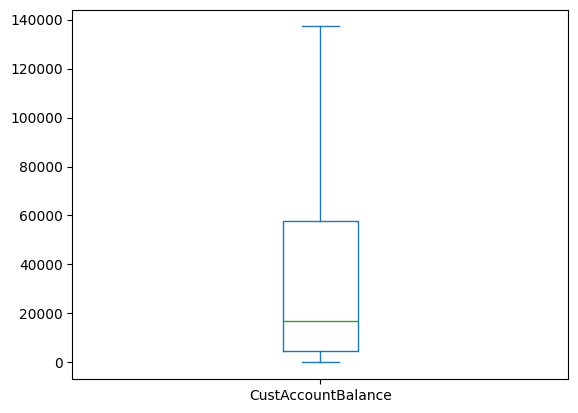

In [39]:
capped_account_bal.plot(kind='box')

In [40]:
df['Account_Balance'] = capped_account_bal
df['CustAccountBalance'] = df['Account_Balance']
del df['Account_Balance']

In [41]:
# Also treat outliers for Transaction amount
trans_amount = df['TransactionAmount (INR)']

#calculate IQR
Q1 = trans_amount.quantile(0.25)
Q3 = trans_amount.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = (trans_amount<lower_bound)|(trans_amount >upper_bound)
print(outliers.sum())

111599


In [42]:
df['TransactionAmount (INR)'] = trans_amount.clip(lower=lower_bound, upper=upper_bound)

<Axes: >

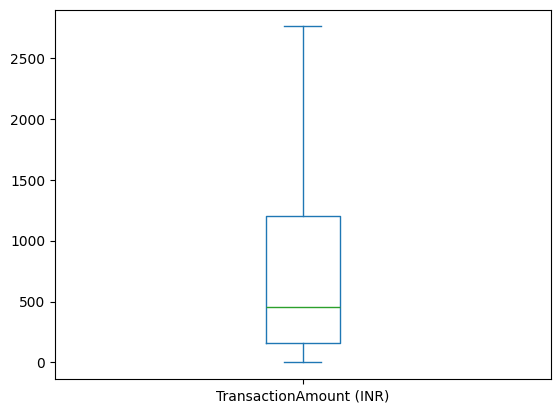

In [43]:
df['TransactionAmount (INR)'].plot(kind='box')

# **3. Exploratory Data Analysis (EDA)**

## a. Summmary statistics

In [44]:
df.head(3)

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,F,JAMSHEDPUR,"17,819.05",2016-02-08,"143,207.00",25.00,22.00
1,T2,C2142763,M,JHAJJAR,"2,270.69",2016-02-08,"141,858.00","2,758.50",59.00
2,T3,C4417068,F,MUMBAI,"17,874.44",2016-02-08,"142,712.00",459.00,20.00


In [45]:
# Datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [46]:
#Check unique gender
df['CustGender'].unique()

array(['F', 'M', 'T'], dtype=object)

In [47]:
#drop T, which i dont find significant in the analysis for its only 1 person
df = df[df['CustGender'].isin(['F', 'M'])]
map_gender = {'F': 'Female', 'M':'Male'}
df['CustGender'] = df['CustGender'].map(map_gender)

In [48]:
#summarize key statistics for age, customer balance, transaction time, and transaction amount
df.describe()

,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
count,"1,044,946.00",1044946,"1,044,946.00","1,044,946.00","1,044,946.00"
mean,"39,584.67",2016-07-25 19:43:01.970742784,"157,100.13",831.12,34.76
min,0.00,2016-01-08 00:00:00,0.00,0.00,0.00
25%,"4,735.65",2016-06-09 00:00:00,"124,033.00",161.00,25.00
50%,"16,817.13",2016-08-20 00:00:00,"164,236.00",459.52,29.00
75%,"57,704.96",2016-09-09 00:00:00,"200,016.00","1,200.00",36.00
max,"137,158.92",2016-12-09 00:00:00,"235,959.00","2,758.50",100.00
std,"47,415.35",NaN,"51,266.09",892.12,17.74


**Summary**

**i) CustAccountBalance**
- Minimum customer account balance is 0
- Maximum account balance is 137,158.92
- 25% of the customers have account balance of 4,735 and below
- The median (50%) is 16, 817.13, meaning 50% of the customers have 16.8k or below in their accounts
- 75% of the customers have 57.7k or less in their accounts
- The mean is 39,584.68 while the std is 47,415.33 showing that there is a some variability between the accounts balances

**ii)Transaction time**

- minimum transaction time is 0 seconds
- Maximum time of transaction is 235,959 seconds
- 25% of the customers took 124,033 seconds or less to carry out transactions
- 50% of the customers took 164,236 seconds or less to transact
- 75% of the customers took 200,016 seconds or les to transact
- These customers took on average 157,100.15 seconds to transact
- The std is 51,266.07 indicating some significant level of variability between the transaction time

**iii) Transaction amount**

- Minimum transaction amount was 0.0 rupees
- Maximum transaction amount was 2,758.50 rupees
- 25% of the customers transacted 161 rupees or below
- 50% of these customers transacted 459.52 rupees or less
- 75% of the customers transacted 1,200.00 rupees or below
- The average transaction amount for all these customers was 831.12rupees
- Std was 892.13 which is relatively a high figure showing that there is a some variation between the transaction amounts across all the customers

iv) **Age**
- Minimum age was 0 years
- Maximum age was 216 years but it was capped at 100 years to help reduce extreme values
- 25% of the customers were aged 25 years or below
- 50% of the customers were aged upto 29 years
- 75% of the total customers were aged 36 years and below
- The mean of customer ages was 34.76 years
- Std was 17,74 indicating that the variability of the ages dropped significantly upon sorting extreme values of ages

## b. Correlation Analysis

In [49]:
# investigate the relationship between the numerical values

numerical_values = df.select_dtypes(include=['float64', 'int64']).columns # to select all the numerical values of the dataset

correlation_matrix = df[numerical_values].corr()

 #use correlatoon heatmap to show the correlation
#plt.figure(figsize=(8,6))
#sns.heatmap(correlation_matrix, annot=True, cmap='inferno')
#plt.title('Correlation Heatmap')
#plt.show()
correlation_matrix

,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age
CustAccountBalance,1.00,0.01,0.25,0.23
TransactionTime,0.01,1.00,0.06,-0.02
TransactionAmount (INR),0.25,0.06,1.00,0.21
Age,0.23,-0.02,0.21,1.00


**Analysis of correlation results**


Account Balance vs Transaction Amount

- The correlation coefficient was 0.25
- It indicated that there a weak but positive relationship between the account balances and the transanction amounts of the customers

Account Balance and Age

- The correlation coefficient is 0.23
- It indicated that there a weak but positive correlation between customers' account balances and their age

Transaction time
- The correlation coefficient of transaction time and customer balance is 0.0084, showing weak and negative relationship
- The coefficient of transaction time and transaction amount is 0.062, showing a positive and weak relationship
- Coeffocient between transaction time and age is -0.022, showing a negative and weak relationship between these two attributes
-**NOTE:** It appears that there is almost no relationship bwtween transaction time with age, transaction amount and account balance, subject to further analysis

Transaction Amount vs Age

- The correlation coefficient is 0.21
- It means that there is a weak positive corelation between the amounts a customer transacts and their age

**Conclusion**

The correlations between all these variables are weak, an indication that there is no strong linear relationship. Therefore, further analysis is necessary to get deeper insights

## c. Distribution

### **Statistics**

In [50]:
df.head(2)

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,Female,JAMSHEDPUR,"17,819.05",2016-02-08,"143,207.00",25.00,22.00
1,T2,C2142763,Male,JHAJJAR,"2,270.69",2016-02-08,"141,858.00","2,758.50",59.00


**i. GENDER**

In [51]:
# 1. GENDER
df['CustGender'].value_counts()

,count
CustGender,
Male,763705
Female,281241


In [52]:
#transaction amount across gender
df.groupby('CustGender')['TransactionAmount (INR)'].agg(
                                                        Average_trans_amount = 'mean',
                                                        Total_trans_amount   = 'sum'
                                                        ).reset_index()

,CustGender,Average_trans_amount,Total_trans_amount
0,Female,915.68,"257,526,053.26"
1,Male,799.98,"610,950,498.21"


The distribution results above show that;

- Males transacted more amounts of moeney with over a total of 6.1 million rupees
- Females transacted lower amounts compared to men with over 2.58 million rupees

- On average, females transacted more than males with 915.68 rupees while male counterparts transacted 799.98.

In [53]:
#transaction time across gender
df.groupby('CustGender')['TransactionTime'].mean()

,TransactionTime
CustGender,
Female,"159,672.51"
Male,"156,152.83"


**Analysis:**
 - On average, females took more time to transact with 159,672.51 seconds
 - Males transacted for average time of 156,152.83 seconds
 - The one person who did not disclose their gender took 170,731 seconds

In [54]:
# account balances
df.groupby('CustGender')['CustAccountBalance'].agg(
                                                        Average_Acc_bal = 'mean',
                                                        Total_acc_bal_amount   = 'sum'
                                                        ).reset_index().sort_values(by = 'Average_Acc_bal', ascending=False)

,CustGender,Average_Acc_bal,Total_acc_bal_amount
0,Female,"43,028.08","12,101,259,128.90"
1,Male,"38,316.60","29,262,582,694.63"


**Analysis:**

- The average acount balances for females was higher than that of males with 43,028.08 rupees
- Males had an average of 38,316.60 rupees on their accounts
- Males also had the highest account balances on sum of 29.3 billion while females had 12.1 billion rupees.

**ii. Location**

In [55]:
# Number of locations
df['CustLocation'].nunique()

9326

The customers are spread in 9326 locations

In [56]:
#overview of the locations
df['CustLocation'].unique()

array(['JAMSHEDPUR', 'JHAJJAR', 'MUMBAI', ..., 'KARANJIA',
       'NR HERITAGE FRESH HYDERABAD', 'IMPERIA THANE WEST'], dtype=object)

In [57]:
#distribution
# a. Account balance
df.groupby('CustLocation')['CustAccountBalance'].mean().reset_index().sort_values(by ='CustAccountBalance', ascending=False)[:10]

,CustLocation,CustAccountBalance
2756,GANAPARTHI,"137,158.92"
7029,RESTAURANT BANGALORE,"137,158.92"
917,BAUG CIRLCE SURAT,"137,158.92"
4586,LOWR PAREL MUMBAI,"137,158.92"
7016,RENTON,"137,158.92"
7024,RESIDENCY SECUNDERABAD,"137,158.92"
7025,RESIDENCY THANE,"137,158.92"
7027,RESORT BANGALORE,"137,158.92"
7030,RESTAURANT HYDERABAD,"137,158.92"
6913,RAMTIRTH NAGAR CENTRAL DELHI,"137,158.92"


**Analysis:**
- Customers in top ten locations had account balances of 137,158.92 rupees
- These top locations include; GANAPARTHI, RESTAURANT BANGALORE, BAUG CIRLCE SURAT, LOWR PAREL MUMBAI, RENTON among others


In [58]:
#also check locations with the lowest
df.groupby('CustLocation')['CustAccountBalance'].mean().reset_index().sort_values(by ='CustAccountBalance', ascending=False)[-30:]

,CustLocation,CustAccountBalance
5664,NEAR BATA MORE KOLKATA,0.11
9257,WINES CHARLAPALLY HYDERABAD,0.10
1954,CUTTACK CUTTACK,0.05
7977,SRIPERUMBUDUR TALUK KANCHEEPURAM,0.04
7261,SAHEBGANJ,0.04
4278,KOPERKHAIRNE NAVI MUMBAI,0.03
4854,MANGALORE D K,0.01
888,BARODA-VADODARA,0.01
8250,TANK HYDERABAD,0.01
5484,NAHSIK,0.00


Analysis:
- We note that there are over 20 locations with average of zero account balances
- It confirms the great variability of account balances noted in the summary statistics explained above

In [59]:
# See locations where customers transacted more
df.groupby('CustLocation')['TransactionAmount (INR)'].mean().reset_index().sort_values(by ='TransactionAmount (INR)', ascending=False)[:10]

,CustLocation,TransactionAmount (INR)
9325,ZUNHEBOTO,"2,758.50"
4228,KOIL BACK SIDE CHENNAI,"2,758.50"
5807,NGR MASJEED HYDERABAD,"2,758.50"
8631,TOLLYGUNJ FIRE STATION KOLKATA,"2,758.50"
7529,SCHOOL MOHANPUR,"2,758.50"
1558,CHARKOP KANDIVALI WEST MUMBAI,"2,758.50"
7523,SCHOOL KHARAGPUR,"2,758.50"
531,ASALPHA GHATKOPAR WEST MUMBAI,"2,758.50"
5780,NEW PANVEL RAIGARH,"2,758.50"
8646,TOWN SUPER MARKET BANGALORE,"2,758.50"


**Analysis:**
- All top ten locations had an average of 2,758.50 rupees

In [60]:
#check the last locations
df.groupby('CustLocation')['TransactionAmount (INR)'].mean().reset_index().sort_values(by ='TransactionAmount (INR)', ascending=False)[-10:]

,CustLocation,TransactionAmount (INR)
3390,I BARDDHAMAN,1.00
617,BABU STATUE CHENNAI,1.00
4127,KHARAGPUR RLY STN KHARAGPUR,1.00
4899,MARATHAHALLI SOUTH BANGALORE SOUTH,1.00
9299,YEOLA DIST NASIK,1.00
5732,NEGARA,0.74
3043,GUJARAT UDWADA,0.00
4009,KARUR DI,0.00
5893,NORTH SYDNEY,0.00
6063,OPP FORTUNE TOWER HYDERABAD,0.00


**Analysis**
- We also have a few loactions where customers transacted an average of zero rupees
- Again, variability is observed in the amounts transacted in various loactions

In [61]:
# transaction time in various locations
df.groupby('CustLocation')['TransactionTime'].mean().reset_index().sort_values(by ='TransactionTime', ascending=False)[:10]

,CustLocation,TransactionTime
775,BANGALORE HSR LAYOUT,"235,748.00"
4879,MANNHEIM,"235,613.00"
1805,COACH BUS STOP MUMBAI,"235,523.00"
6241,PANIPAT PANIPAT,"235,255.50"
4119,KHAR KHAR DELIVERY MUMBAI,"235,082.50"
427,ANDHERI W,"234,837.00"
1859,COLOUR CITY BOISAR W,"234,815.00"
1974,DADAR WEST MUMBAI,"234,708.00"
3176,HATIARA PURBACHAL HOU SOC KOLKATA,"234,653.00"
6978,RD ANDHERI E MUMBAI,"234,644.00"


**Analysis**
- Customers in Bungalore Hsr Layout took the longest time to transact on average with customers in that area spending an average of 235,748 seconds
- Mannhem came second with an average of 235,613 seconds
- It is noted that there is no significant difference in the average transaction periods

In [62]:
# transaction time in various locations
df.groupby('CustLocation')['TransactionTime'].mean().reset_index().sort_values(by ='TransactionTime', ascending=False)[-10:]

,CustLocation,TransactionTime
222,AJITGARH,"1,526.00"
8329,TEMPLE U BALANKA EAST GODAVARI DT,"1,158.00"
6239,PANIAPT,"1,145.00"
3810,KALYAN E MUMBAI,"1,116.50"
437,ANDHRI E MUMBAI,"1,104.00"
8677,TRIRUPATI NAGAR II VIRAR W THANE,939.00
1307,BROOKLYN,656.00
3903,KANDIVALI-E MUMBAI,554.00
404,ANDHERI (WEST) MUMBAI,256.00
2882,GHATKOPAR(W) MUMBAI,52.00


**Analysis**
- Customers in Ghatkopar(W) Mumbai took the shortest time to transact on average with only 52 seconds
- Andheri (West) Mumbai was second with an average of 256 seconds on average
- 5 out of the 10 of location with shortest transaction time came from Mumbai perhaps there are better customer services or few data points were inclued. In this case, further analysis is required

In [63]:
df.head(3)

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,Female,JAMSHEDPUR,"17,819.05",2016-02-08,"143,207.00",25.00,22.00
1,T2,C2142763,Male,JHAJJAR,"2,270.69",2016-02-08,"141,858.00","2,758.50",59.00
2,T3,C4417068,Female,MUMBAI,"17,874.44",2016-02-08,"142,712.00",459.00,20.00


### Visualization


**Univariate Analysis**

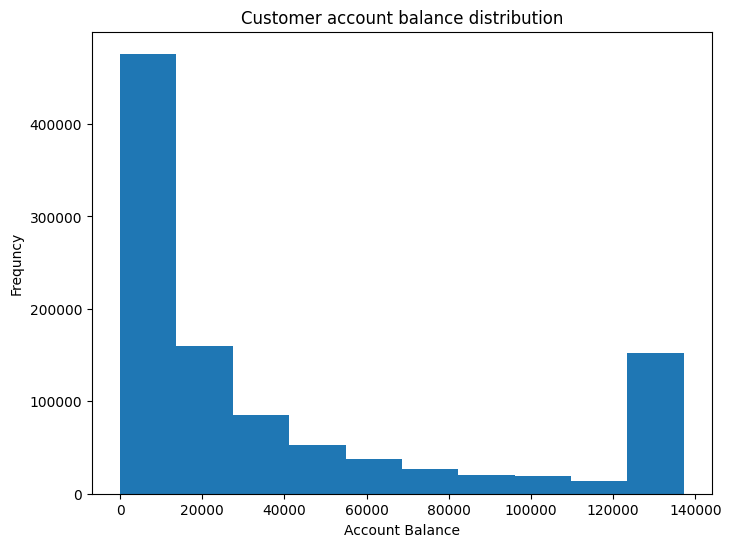

In [64]:
# Distribution of account balances
plt.figure(figsize=(8,6))
df['CustAccountBalance'].plot(kind='hist')
plt.title('Customer account balance distribution')
plt.xlabel('Account Balance')
plt.ylabel('Frequncy')
plt.show()

**Analysis**
- It appears that most account balances range between 0 to 20,000 rupees
- The frequency of account balances significantly drops upto around 130k rupees.
- There is a class of persons who have high bank balances of above 120,000 but below 140,000

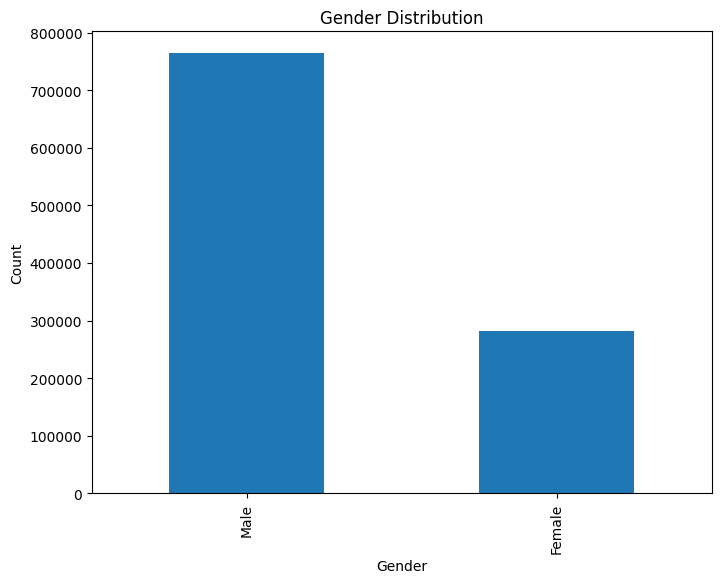

In [65]:
# Distribution of gender
plt.figure(figsize=(8,6))
df['CustGender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

- The bar graph above indicates that there are more males than there are females in the dataset

**Bivariate Analysis**


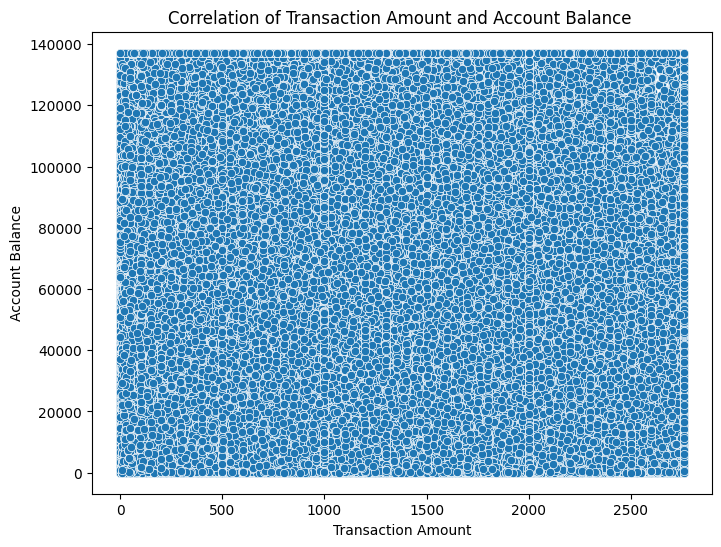

In [66]:
# see the correlation between account balance and transaction amount
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, y='CustAccountBalance', x = 'TransactionAmount (INR)')
plt.title('Correlation of Transaction Amount and Account Balance ')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Balance')
plt.show()

- There is no clear linear relationship between the account balance and the transaction amount.
- It confirms the weak correlation coefficient of 0.25 observed earlier

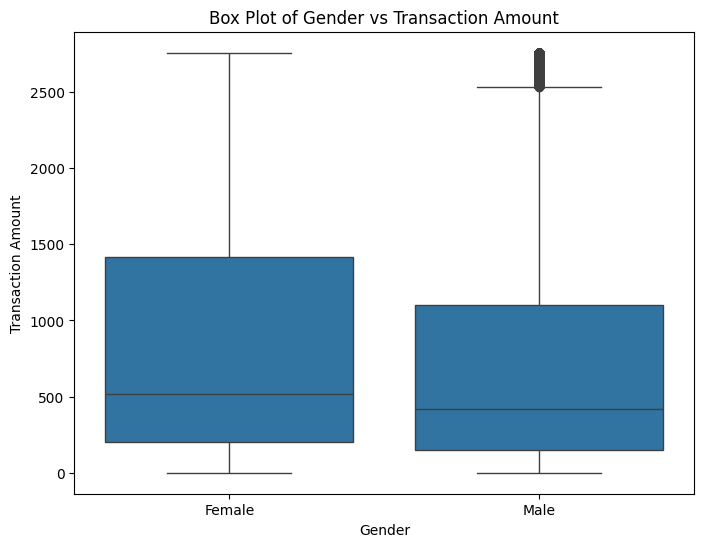

In [67]:
# Box plot of gender against transaction amount
plt.figure(figsize=(8,6))
sns.boxplot(data = df, x = 'CustGender', y= 'TransactionAmount (INR)')
plt.title('Box Plot of Gender vs Transaction Amount')
plt.xlabel('Gender')
plt.ylabel('Transaction Amount')
plt.show()

**Analysis**

Female
- Minimum is 0
- maximum is about 2700
-50% percentile is 500
- 25% percentile was about 200
- 75% was about 1400

Male

- Minimum is 0
- Maximum is about 2750
- 50% percentile is around 420
- 25% percentile is about 20
- 75% percentile was about 1100 rupees

**Conclusion**
- The boxplot results indicate that females keep relatively higher amounts in their accounts acrosss all the quantiles

**Multivariate Analysis**


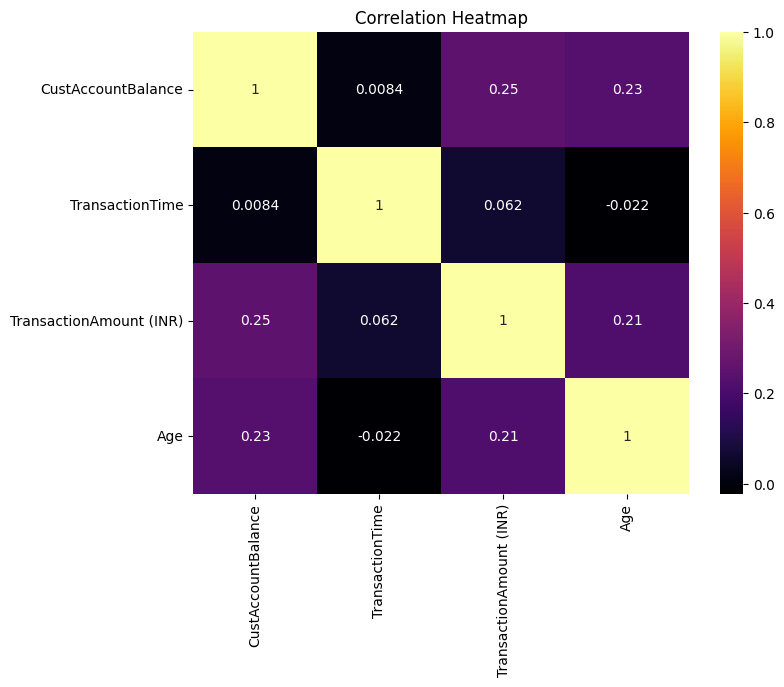

In [68]:

 #use correlatoon heatmap to show the correlation
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno')
plt.title('Correlation Heatmap')
plt.show()

- The heatmap confirms the correlation matrix results analyzed earlier
- What is clearly noted is that there is very weak relationship between some of the variables with no clear linear relationship between others

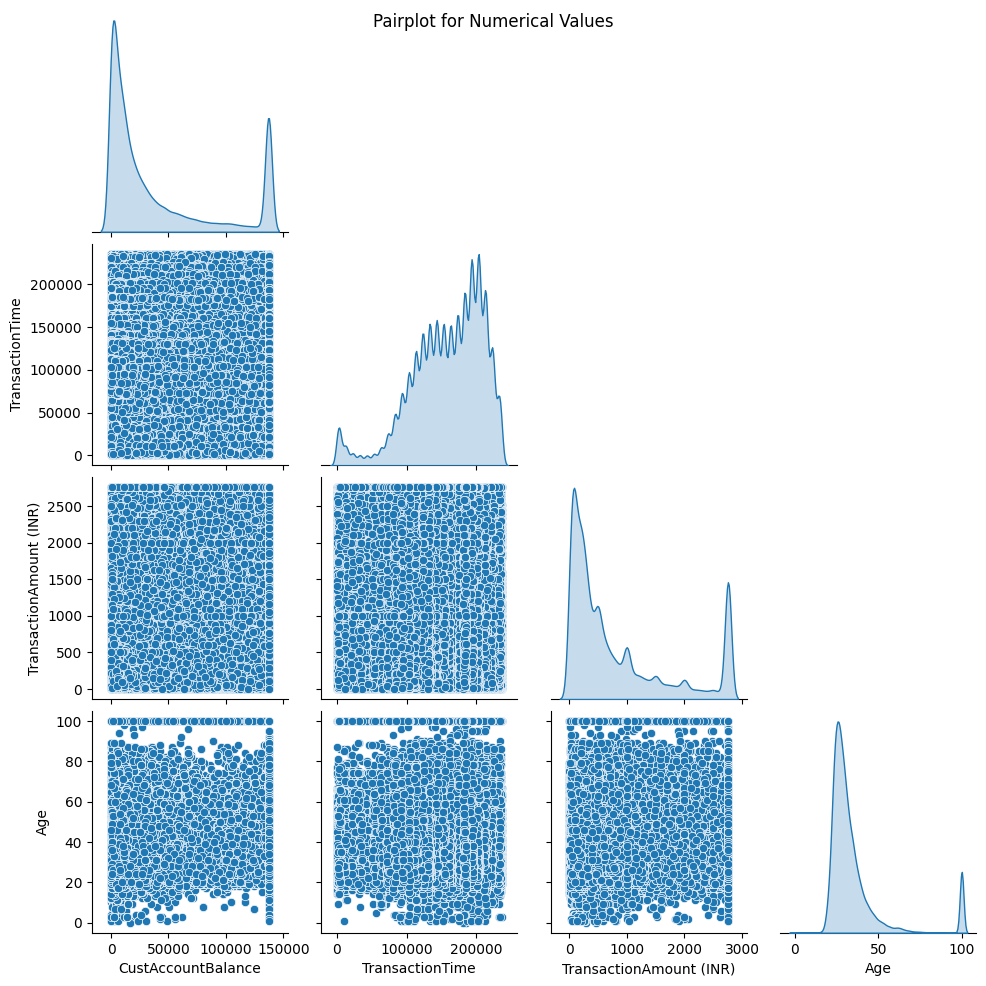

In [69]:
# Pairplot

data = numerical_values = df.select_dtypes(include=['float64', 'int64']).columns # to select all the numerical values of the dataset
sns.pairplot(data=df, diag_kind='kde', corner=True)
plt.suptitle('Pairplot for Numerical Values')
plt.show()

- The pair plot confirms that there is no clear linear relationship among different variables

# **4.Hypothesis Analysis**

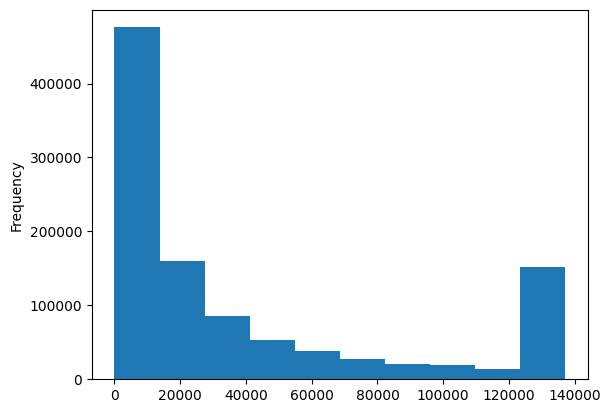

In [70]:
# normality test of: 1. account balance
df['CustAccountBalance'].plot(kind='hist')
plt.show()

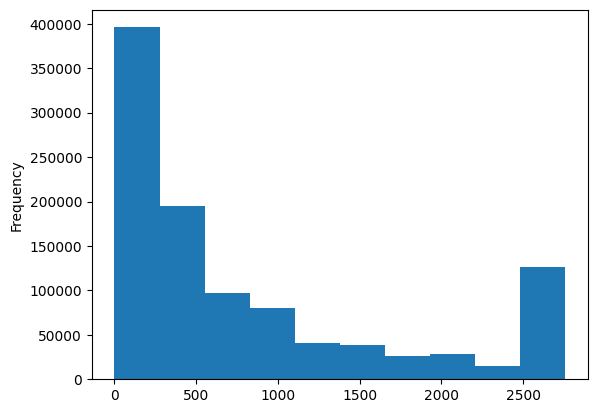

In [71]:
# normality test of: 2. transaction amount
df['TransactionAmount (INR)'].plot(kind='hist')
plt.show()

## **a. Gender**

**i. Transaction amount**

**Is there statistically significant difference in transaction amount across gender?**

**Null Hypothesis (H₀)**

H0: There is no significant statistical difference in the transaction amounts between gender

**Alternative Hypothesis (H₁)**


H1: At least one gender has a significantly higher transaction amounts

α=0.05

In [72]:
# check samples
samples = df['CustGender'].nunique()
samples

2

In [73]:
# Test for normality using shapiro test
from scipy import stats as stats
female_trans_amount = df[df['CustGender']=='Female']['TransactionAmount (INR)']
male_trans_amount = df[df['CustGender']=='Male']['TransactionAmount (INR)']

# Implement shapiro test
female_shapiro_results = stats.shapiro(female_trans_amount)
male_shapiro_results = stats.shapiro(male_trans_amount)

print(f'Shapiro test for female customers: {female_shapiro_results}')
print(f'Shapiro test for male customers: {male_shapiro_results}')

Shapiro test for female customers: ShapiroResult(statistic=0.8173959349384905, pvalue=1.5844066854572236e-152)
Shapiro test for male customers: ShapiroResult(statistic=0.7831762450671693, pvalue=1.4666052740585357e-176)


In [74]:
1.5844066854572236e-152 < 0.05 and 1.4666052740585357e-176 < 0.05

True

**Interpretation of Shapiro test**
- If Shapiro p-value is less than 0.05, it means that the data is not normal
- In our case, the p-values of both female and male shapiro test were less than 0.05, therefore data not normal
- Hence, we use Mann-Whitney U Test to do hypothesis testing

In [75]:
# claculate the t-test and p-values
u_test, p_value = stats.mannwhitneyu(female_trans_amount, male_trans_amount, alternative='two-sided')
print(f'U-test: {u_test}\nP_value: {p_value}')

U-test: 116720685478.5
P_value: 0.0


In [76]:
p_value > 0.05

False

In [77]:
# interpret hypothesis results

alpha = 0.05

print('Intepretation')

if p_value > alpha:
  print('Reject null hypothesis')
else:
  print('Reject alternative hypothesis')

Intepretation
Reject alternative hypothesis


**Interpretation of Hypothesis results**

- The p_value of the mann-Whitney U Test is less than 0.05
- It therefore indicates that there is no adquate evidence to conclude that At least one gender has a significantly higher transaction amounts

**Conclusion**
- In this case, it is right to argue that there is no statistical evidence to show that one gender transacted more amounts than the other

**ii. Bank balances**

**Is there statistically significant difference in customer bank balances across gender?**

**Null Hypothesis (H₀)**

H0: There is no significant statistical difference in the bank balances between gender

**Alternative Hypothesis (H₁)**


H1: At least one gender has a statistically significant higher bank balance amounts

α=0.05

In [78]:
# Test for normality using shapiro test
from scipy import stats as stats
female_bank_bal = df[df['CustGender']=='Female']['CustAccountBalance']
male_bank_bal = df[df['CustGender']=='Male']['CustAccountBalance']

# Implement shapiro test
female_shapiro_results = stats.shapiro(female_bank_bal)
male_shapiro_results = stats.shapiro(male_bank_bal)

print(f'Shapiro test for female customers: {female_shapiro_results}')
print(f'Shapiro test for male customers: {male_shapiro_results}')

Shapiro test for female customers: ShapiroResult(statistic=0.7759669546580176, pvalue=3.2427761760037387e-159)
Shapiro test for male customers: ShapiroResult(statistic=0.7444635082022669, pvalue=2.367132735388234e-182)


In [79]:
3.2427761760037387e-159 < 0.05 and 2.367132735388234e-182 < 0.05

True

**Interpretation of Shapiro test**
- If Shapiro p-value is less than 0.05, it means that the data is not normal
- In our case, the p-values of both female and male shapiro test were less than 0.05, therefore data not normal
- Hence, we use Mann-Whitney U Test to do hypothesis testing

In [80]:
# claculate the t-test and p-values
u_test, p_value = stats.mannwhitneyu(female_bank_bal, male_bank_bal, alternative='two-sided')
print(f'U-test: {u_test}\nP_value: {p_value}')

U-test: 116539219088.0
P_value: 0.0


In [81]:
# interpret hypothesis results

alpha = 0.05

print('Intepretation')

if p_value > alpha:
  print('Reject null hypothesis')
else:
  print('Reject alternative hypothesis')

Intepretation
Reject alternative hypothesis


**Interpretation of Hypothesis results**

- The p_value of the mann-Whitney U Test is less than 0.05
- It therefore indicates that there is no adquate evidence to conclude that At least one gender has a significantly higher bank balance amounts

**Conclusion**
- In this case, it is right to argue that there is no statistical evidence to show that one gender kept more bank balance amounts than the other

## **b. Location**

**Is there statistically significant difference in bank balance amount across different locations?**

**Null Hypothesis (H₀)**

H0: There is no significant statistical difference in the bank balance amounts across different locations

**Alternative Hypothesis (H₁)**


H1: There are locations where customers tend to keep relatively higher bank balance amounts than others

α=0.05

In [82]:
# Check samples
samples = df['CustLocation'].nunique()
samples

9326

- We have over 3 samples, therefore we use either ANOVA or Kruskal-Wallis Test
- However, having noted that the data is not normally distributed, we use Kruskal-Wallis Test which is a non-parametric test

In [83]:
from scipy.stats import kruskal

list_of_data = []
for location in df['CustLocation'].unique():
  unique_loc = df[df['CustLocation']==location]['CustAccountBalance']
  unique_loc_list = unique_loc.to_list()
  list_of_data.append(unique_loc_list)
stats, p_value = kruskal(*list_of_data)


In [84]:
print(f'Stats: {stats}\nP_value: {p_value}')

Stats: 105516.22657268963
P_value: 0.0


In [85]:
p_value < 0.05

True

In [86]:
# interpret hypothesis results

alpha = 0.05

print('Intepretation')

if p_value > alpha:
  print('Reject null hypothesis')
else:
  print('Reject alternative hypothesis')

Intepretation
Reject alternative hypothesis


**Interpretation of Hypothesis results**

- The p_value of the  Kruskal-Wallis Test is less than 0.05
- It therefore indicates that there are locations where customers tend to keep relatively higher bank balance amounts than others

**Conclusion**
- In this case, it is right to argue that there is no significant statistical difference in the bank balance amounts across different locations

# **5.RFM Analysis**

**Recency**

In [87]:
df.head(2)

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,Female,JAMSHEDPUR,"17,819.05",2016-02-08,"143,207.00",25.00,22.00
1,T2,C2142763,Male,JHAJJAR,"2,270.69",2016-02-08,"141,858.00","2,758.50",59.00


In [88]:
# Assume the last day of transaction was the day of analysis
analysis_date = df['TransactionDate'].max()


# Recency = analysis date - last date customer transacted
latest_trans_date = df.groupby('CustomerID')['TransactionDate'].max()
recency = (analysis_date-latest_trans_date).dt.days.reset_index()
recency.rename(columns={'TransactionDate': 'Recency'}, inplace=True)
recency.head()

,CustomerID,Recency
0,C1010011,74
1,C1010012,117
2,C1010014,154
3,C1010018,85
4,C1010024,113


**Monetary**

In [89]:
#create monetary by grouping transaction amounts
monetary = df.groupby('CustomerID', as_index=False)['TransactionAmount (INR)'].sum()
monetary.rename(columns={'TransactionAmount (INR)': 'Monetary'}, inplace=True)
monetary.head()

,CustomerID,Monetary
0,C1010011,"3,114.50"
1,C1010012,"1,499.00"
2,C1010014,"1,455.00"
3,C1010018,30.00
4,C1010024,"2,758.50"


**Frequency**

In [90]:
#create frequency by grouping the transaction IDs
frequency = df.groupby('CustomerID', as_index=False)['TransactionID'].nunique()
frequency.rename(columns={'TransactionID':'Frequency'},inplace=True)
frequency.sample(5)

,CustomerID,Frequency
202252,C2834626,1
834971,C8638682,1
471366,C5323184,1
791706,C8240481,1
473010,C5329251,1


In [91]:
# merge the dataframes
rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,C1010011,74,2,"3,114.50"
1,C1010012,117,1,"1,499.00"
2,C1010014,154,2,"1,455.00"
3,C1010018,85,1,30.00
4,C1010024,113,1,"2,758.50"


In [92]:
# create bins and labels
rfm['Recency_score'] = pd.qcut(rfm['Recency'].rank(method='first'), q=5, labels=[5,4,3,2,1])
rfm['Monetary_score'] = pd.qcut(rfm['Monetary'].rank(method='first'), q=5, labels=[1,2,3,4,5])
rfm['Frequency_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=5, labels=[1,2,3,4,5])
rfm['Score'] = rfm['Recency_score'].astype(str) + rfm['Monetary_score'].astype(str) + rfm['Frequency_score'].astype(str)

In [93]:
rfm.sample(5)

,CustomerID,Recency,Frequency,Monetary,Recency_score,Monetary_score,Frequency_score,Score
826855,C8594190,110,1,"1,050.00",3,4,4,344
523470,C5815564,102,1,"2,758.50",4,5,3,453
758848,C7939413,30,1,346.00,5,2,4,524
51815,C1440766,110,1,"1,536.00",3,4,1,341
415561,C4817139,104,1,"1,487.00",3,4,2,342


In [94]:
# lets write a short function to elaborate the score further by segmentation
def segment_customers (row):
  if row['Score']=='555':
    return 'Premium customers'
  elif row['Frequency_score']>=4:
    return 'Loyal customers'
  elif row['Monetary_score']>=4:
    return 'Heavy transactors'
  elif row['Recency_score']<=2:
    return 'Low engagement customers'
  elif row['Recency_score']<=3 and row['Frequency']<=2:
    return 'Dormant customers'
  else:
    return 'Lost customers'


In [95]:
# create a segment column then apply
rfm['Segment'] = rfm.apply(segment_customers, axis=1)
rfm.sample(3)

,CustomerID,Recency,Frequency,Monetary,Recency_score,Monetary_score,Frequency_score,Score,Segment
270114,C3442927,102,1,"1,170.00",4,4,2,442,Heavy transactors
19456,C1141738,336,1,301.00,1,2,1,121,Low engagement customers
126911,C2136369,244,1,"2,758.50",1,5,1,151,Heavy transactors


In [96]:
#Filter the loyal customers
rfm[rfm['Segment']=='Premium customers'][:10]

,CustomerID,Recency,Frequency,Monetary,Recency_score,Monetary_score,Frequency_score,Score,Segment
0,C1010011,74,2,"3,114.50",5,5,5,555,Premium customers
12,C1010041,61,3,"5,175.50",5,5,5,555,Premium customers
66,C1010247,30,2,"2,788.50",5,5,5,555,Premium customers
160,C1010613,82,2,"2,911.50",5,5,5,555,Premium customers
179,C1010660,61,3,"3,310.00",5,5,5,555,Premium customers
246,C1010878,0,2,"2,578.00",5,5,5,555,Premium customers
310,C1011140,82,2,"2,091.00",5,5,5,555,Premium customers
338,C1011263,61,2,"3,010.50",5,5,5,555,Premium customers
386,C1011445,82,2,"2,014.62",5,5,5,555,Premium customers
417,C1011541,74,2,"2,895.58",5,5,5,555,Premium customers


- Above is the list of the customers who transact highest amounts, visit the bank frequently and recently transacted with the bank
- Upon formulation of policies concerning customers, these are the customers that the bank should prioritize


In [97]:
rfm[rfm['Segment']=='Dormant customers'].sample(10)

,CustomerID,Recency,Frequency,Monetary,Recency_score,Monetary_score,Frequency_score,Score,Segment
529592,C5838545,109,1,300.00,3,2,3,323,Dormant customers
211277,C2927351,109,1,120.00,3,1,2,312,Dormant customers
560663,C6132520,108,1,778.34,3,3,3,333,Dormant customers
145207,C2323663,106,1,708.00,3,3,1,331,Dormant customers
165449,C2518545,113,1,324.10,3,2,1,321,Dormant customers
482261,C5423154,111,1,669.00,3,3,3,333,Dormant customers
76894,C1713089,106,1,200.00,3,2,1,321,Dormant customers
285930,C3621267,109,1,228.00,3,2,2,322,Dormant customers
124022,C2125677,105,1,25.00,3,1,1,311,Dormant customers
566272,C6213776,113,1,200.00,3,2,3,323,Dormant customers


- The company has over 71,000 dormant customers
- Therefore, the bank needs to conduct a study to establish the cause for so many dormant customers and evaluate the strategies to activating their engagement efforts

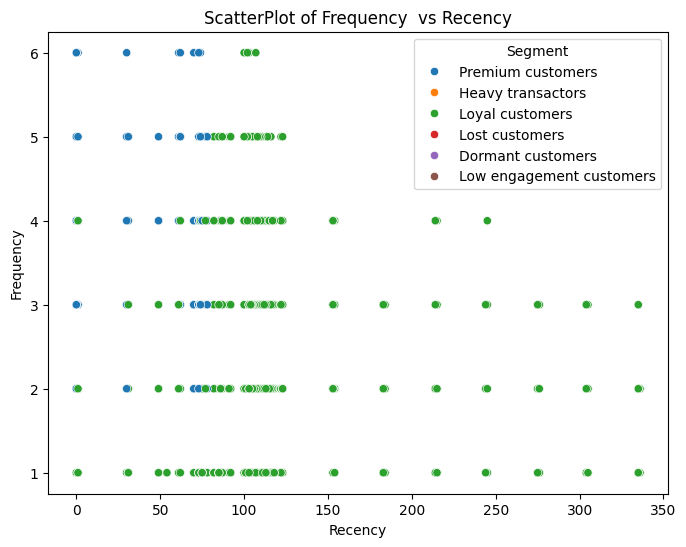

In [98]:
# Visualize the rfm score results of frequency against monetary
plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Segment')
plt.title('ScatterPlot of Frequency  vs Recency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

# **6.Cohort Analysis**

In [99]:
#data overview
df.head(2)

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,Female,JAMSHEDPUR,"17,819.05",2016-02-08,"143,207.00",25.00,22.00
1,T2,C2142763,Male,JHAJJAR,"2,270.69",2016-02-08,"141,858.00","2,758.50",59.00


In [100]:
# create transaction month
df['TransactionMonth'] =df['TransactionDate'].dt.to_period('M')
cohort = df.groupby('CustomerID')['TransactionMonth'].min().reset_index()
cohort.rename(columns={'TransactionMonth':'CohortMonth'}, inplace=True)
cohort.head()

,CustomerID,CohortMonth
0,C1010011,2016-09
1,C1010012,2016-08
2,C1010014,2016-01
3,C1010018,2016-09
4,C1010024,2016-08


In [101]:
# merge the dataframe on the main dataframe
df = df.merge(cohort, on = 'CustomerID')
df.head(2)

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,TransactionMonth,CohortMonth
0,T1,C5841053,Female,JAMSHEDPUR,"17,819.05",2016-02-08,"143,207.00",25.00,22.00,2016-02,2016-02
1,T2,C2142763,Male,JHAJJAR,"2,270.69",2016-02-08,"141,858.00","2,758.50",59.00,2016-02,2016-02


In [102]:
#calculating retention

#group by both cohort month and transaction month
cohort_df = df.groupby(['CohortMonth', 'TransactionMonth']).agg(n_customer=('CustomerID','nunique')).reset_index()
cohort_df.head(5)

,CohortMonth,TransactionMonth,n_customer
0,2016-01,2016-01,42295
1,2016-01,2016-02,633
2,2016-01,2016-03,622
3,2016-01,2016-04,723
4,2016-01,2016-05,578


In [103]:
#group the cohort_df by cohort month and pick the first
cohort_size = cohort_df.groupby('CohortMonth')['n_customer'].first().reset_index()
cohort_size.rename(columns={'n_customer': 'Cohort_size'}, inplace=True)

In [104]:
#merge with cohort_df
cohort_df = cohort_df.merge(cohort_size, on='CohortMonth')
cohort_df

,CohortMonth,TransactionMonth,n_customer,Cohort_size
0,2016-01,2016-01,42295,42295
1,2016-01,2016-02,633,42295
2,2016-01,2016-03,622,42295
3,2016-01,2016-04,723,42295
4,2016-01,2016-05,578,42295
...,...,...,...,...
73,2016-10,2016-11,569,37137
74,2016-10,2016-12,531,37137
75,2016-11,2016-11,34008,34008
76,2016-11,2016-12,470,34008


In [105]:
#create new column called transaction rate
cohort_df['Transaction_Rate'] = cohort_df['n_customer']/ cohort_df['Cohort_size']

#del cohort_df['Retention_Rate']
cohort_df

,CohortMonth,TransactionMonth,n_customer,Cohort_size,Transaction_Rate
0,2016-01,2016-01,42295,42295,1.00
1,2016-01,2016-02,633,42295,0.01
2,2016-01,2016-03,622,42295,0.01
3,2016-01,2016-04,723,42295,0.02
4,2016-01,2016-05,578,42295,0.01
...,...,...,...,...,...
73,2016-10,2016-11,569,37137,0.02
74,2016-10,2016-12,531,37137,0.01
75,2016-11,2016-11,34008,34008,1.00
76,2016-11,2016-12,470,34008,0.01


In [106]:
#create a transaction matrix by use of a pivot table

transaction_matrix = cohort_df.pivot(
                              index = 'CohortMonth',
                              columns = 'TransactionMonth',
                              values = 'Transaction_Rate'


)
transaction_matrix


TransactionMonth,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12
CohortMonth,,,,,,,,,,,,
2016-01,1.00,0.01,0.01,0.02,0.01,0.02,0.02,0.14,0.05,0.02,0.02,0.01
2016-02,NaN,1.00,0.02,0.02,0.02,0.02,0.02,0.13,0.05,0.02,0.02,0.01
2016-03,NaN,NaN,1.00,0.01,0.01,0.02,0.02,0.13,0.05,0.02,0.02,0.01
2016-04,NaN,NaN,NaN,1.00,0.02,0.01,0.02,0.13,0.05,0.02,0.02,0.01
2016-05,NaN,NaN,NaN,NaN,1.00,0.01,0.02,0.13,0.05,0.02,0.01,0.01
2016-06,NaN,NaN,NaN,NaN,NaN,1.00,0.02,0.13,0.05,0.02,0.02,0.01
2016-07,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.13,0.05,0.02,0.02,0.01
2016-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.05,0.02,0.02,0.01
2016-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.02,0.02,0.01


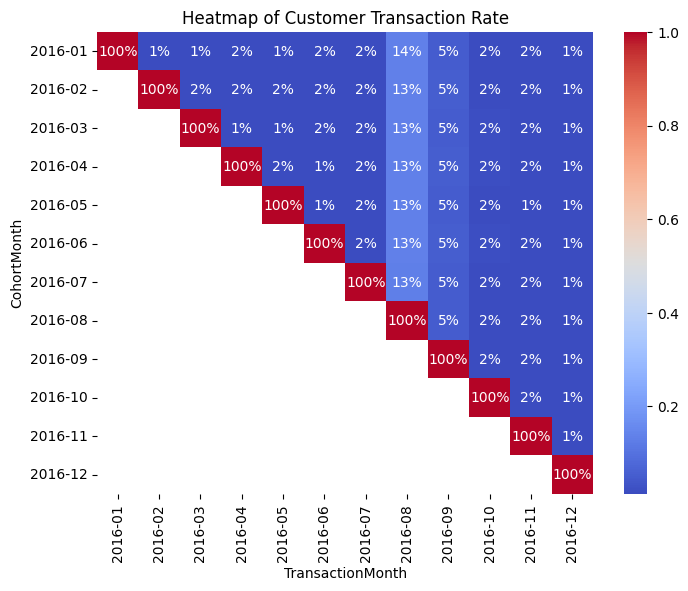

In [107]:
# use heatmap to visualize the matrix

plt.figure(figsize=(8,6))
sns.heatmap(transaction_matrix, annot = True, cmap='coolwarm', fmt='.0%')
plt.title('Heatmap of Customer Transaction Rate')
plt.show()

**Analysis of the Transaction matrix**

- The heatmap shows that the transaction rates of the cohorts decline significantly from the first month
- However, there are some spikes in Auguest and September would would as a result of seasonal effects
- Further analysis shows that Indians celebrate Raksha Bandhan in August which is basically a gifting festival among siblings which would result to increased bank transactions in August
- India also celebrates independence day in August (August 15) which would be characterized by promotions and campaigns which would increase bank transactions.


# **7. Conclusion**

**a. Dataset, cleaning and processing**
- Here is the link to my dataset: https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation

- The dataset is made of 1048567 rows and 9 columns
- Data info indicated that most columns were in the right datatypes apart from transaction date and DOB which was converted successfully
- We had a couple of missing values in customerDOB, gender, location and account balance
- DOB was used to calculate the customer age, then treated the outliers before replacing values with customer mean age to avoid losing much datapoints if dropped.
- Age was treated by capping maximum age to 100 years to eliminate a couple of outliers which were over 210 years
- There was no other alternative for treating missing values in gender, location and account balances but dropping them (they were few datapoints anyway compared to the total datapoints)
- Account balance, transaction amounts outliers were treated by capping them to upper and lower bounds of IQR


**b. EDA**
 - The data reveals that customer account balances and transaction amounts show significant variability, with mean balances of ₹39,584.68 and mean transaction amounts of ₹831.12, alongside high standard deviations
 - Transaction times and customer ages exhibit notable spread, with median transaction times of approximately 164,236 seconds and customer ages averaging 34.76 years, reflecting a reduced variability after capping extreme values

 - The correlations analysis between all these variables are weak, an indication that there is no strong linear relationship. Therefore, further analysis is necessary to get deeper insights especially by identifying non-linear relationships.


**c. Hypothesis Analysis**

 - We intended to test whether there was a statistically significant difference in the transaction amounts and balance account amounts across gender
 - The results indicated that there was no adquate evidence to conclude that at least one gender has a significantly higher transaction or balance amounts
 - Similarly, we also intended to establish if there was a statistically significant difference in bank balance amounts for customers in different locations
 - The results indicated that there is no significant statistical difference in the bank balance amounts across different locations.

**d. RFM Analysis**
- The bank has 20046 premium customers who transacted frequently and also handled relatively huge amounts.
- The bank should prioritize on these customers when rolling out rewards for loyal customers
- However, the bank has also over 70k dormant customers and who the bank should carry out a survey to establish the reason and consider incentives and promotions that would encourage them to transact more with the bank

**d. Cohort Analysis**

- The analysis indicated that there was a spike in transaction rate in August 2016, with most of customers transacting during that period
- Research indicated that Indians celebrated Raksha Bandhan and independence during same period, something that could have spiked the transactions in August.



**Challenges faced and Recommendations**

- I had to learn how to use Lambda, which is a small anonymous function that can take any number of arguments, but can only have one expression. Eventually i managed to use it in the project.
- Some codes were taking really sometime to run and execute a request
- There was a very weak linear relationships between attributes and therefore, this projects recommends use of advanced analysis models such as machine learning and deep learning to establish whether there was other relationships, especially non-linear relationships.